In [1]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [2]:
# Model / data parameters
num_classes = 10
input_shape = (28, 28, 1)

In [3]:
# train i test podaci
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

In [4]:
# prikaz karakteristika train i test podataka
print('Train: X=%s, y=%s' % (x_train.shape, y_train.shape))
print('Test: X=%s, y=%s' % (x_test.shape, y_test.shape))

Train: X=(60000, 28, 28), y=(60000,)
Test: X=(10000, 28, 28), y=(10000,)


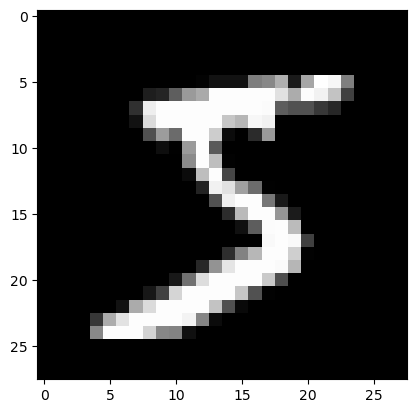

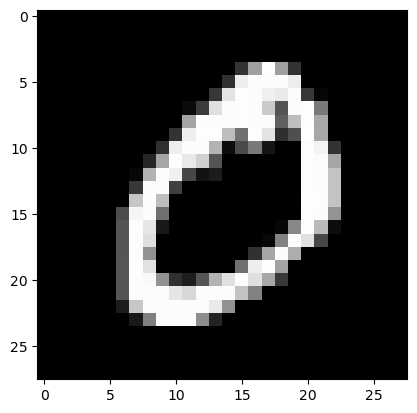

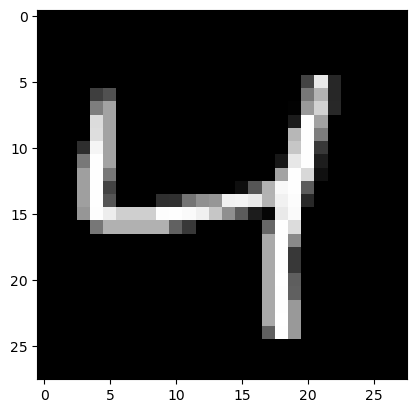

In [5]:
# TODO: prikazi nekoliko slika iz train skupa
from matplotlib import pyplot as plt
plt.imshow(x_train[0], 'gray')
plt.show()
plt.imshow(x_train[1], 'gray')
plt.show()
plt.imshow(x_train[2], 'gray')
plt.show()

In [6]:
# skaliranje slike na raspon [0,1]
x_train_s = x_train.astype("float32") / 255
x_test_s = x_test.astype("float32") / 255

In [7]:
# slike trebaju biti (28, 28, 1)
x_train_s = np.expand_dims(x_train_s, -1)
x_test_s = np.expand_dims(x_test_s, -1)

In [8]:
print("x_train shape:", x_train_s.shape)
print(x_train_s.shape[0], "train samples")
print(x_test_s.shape[0], "test samples")

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [9]:
# pretvori labele
y_train_s = keras.utils.to_categorical(y_train, num_classes)
y_test_s = keras.utils.to_categorical(y_test, num_classes)

In [1]:
# TODO: kreiraj model pomocu keras.Sequential(); prikazi njegovu strukturu

model = keras.Sequential()

model.add(layers.Input(shape=(28,28,1), name="ulaz"))
model.add(layers.Conv2D(32, kernel_size=(3,3), padding='same', activation="relu"))
model.add(layers.MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(64, kernel_size=(3,3), padding='same', activation="relu"))
model.add(layers.MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(200, activation="relu"))
model.add(layers.Dropout(rate = 0.5))
model.add(layers.Dense(50, activation="relu"))
model.add(layers.Dense(10, activation="softmax", name="izlaz"))

model.summary()

NameError: name 'keras' is not defined

In [23]:
# TODO: definiraj karakteristike procesa ucenja pomocu .compile()
history = model.compile(loss="categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])

In [24]:
# TODO: provedi ucenje mreze
batch_size = 32
epochs = 5
history = model.fit(x_train_s, y_train_s, batch_size = batch_size, epochs = epochs, validation_split=0.1)

Epoch 1/5
1688/1688 [==============================] - 75s 43ms/step - loss: 0.3152 - accuracy: 0.9028 - val_loss: 0.0612 - val_accuracy: 0.9818
Epoch 2/5
1688/1688 [==============================] - 67s 39ms/step - loss: 0.1063 - accuracy: 0.9682 - val_loss: 0.0438 - val_accuracy: 0.9868
Epoch 3/5
1688/1688 [==============================] - 72s 43ms/step - loss: 0.0812 - accuracy: 0.9759 - val_loss: 0.0447 - val_accuracy: 0.9865
Epoch 4/5
1688/1688 [==============================] - 67s 40ms/step - loss: 0.0685 - accuracy: 0.9789 - val_loss: 0.0364 - val_accuracy: 0.9897
Epoch 5/5
1688/1688 [==============================] - 69s 41ms/step - loss: 0.0599 - accuracy: 0.9817 - val_loss: 0.0329 - val_accuracy: 0.9903


Test loss: 0.0299978144466877
Test accuracy: 0.9909999966621399
313/313 [==============================] - 3s 10ms/step


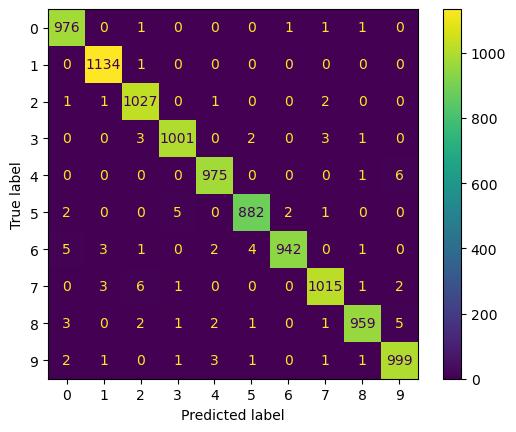

In [25]:
# TODO: Prikazi test accuracy i matricu zabune
score = model.evaluate(x_test_s, y_test_s, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

predicted_classes = np.argmax(model.predict(x_test_s), axis = -1)
cm = confusion_matrix(y_test, predicted_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [27]:
# TODO: spremi model
model.save('CNN_model')
#model = keras.models.load_model('path/to/location')

INFO:tensorflow:Assets written to: CNN_model\assets


INFO:tensorflow:Assets written to: CNN_model\assets
